In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt #used to avoid a warning message

In [3]:
import pandas as pd
import csv
import os

folder=input("Which is your input folder? ")
os.chdir("./"+folder)

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0]
        rankNum=int(row[1])

Which is your input folder?  prova


In [4]:
names=["_total_production_","_total_cost_of_production_","_total_cost_of_unused_factors_",
       "_total_inventories_","_total_in_progress_inventories_",
       "_total_lost_production_","_total_cost_of_lost_production_","_updatedLabor_","_updatedCapital_"]

In [5]:
# database
data={}
for name in names:
    data[name]=[]
    for k in range(rankNum):
        data[name].append(pd.read_csv(fileNameRoot+name+str(k)+".csv", header=None))

    data[name].append(data[name][0].copy()) #copy of first rank
    for k in range(1,rankNum):   #add others
        data[name][-1]=data[name][-1].add(data[name][k])

'_total_production_, all ranks'

,0,1,2
0,19.243474,20.184697,7.071822
1,35.855034,31.438770,2.113474
2,48.934239,44.313833,0.728565
3,60.813614,52.264614,0.336578
4,60.813614,56.619259,0.381658
...,...,...,...
95,16.916234,8.943606,2.861407
96,16.916234,4.100471,2.139932
97,17.769082,15.937316,0.000000
98,17.769082,14.709955,0.130545


'____________________________________________________________'

'_total_cost_of_production_, all ranks'

,0,1,2
0,37.5,36.0,19.95
1,69.0,57.6,4.20
2,94.5,81.6,2.10
3,117.0,96.0,1.05
4,117.0,104.4,3.15
...,...,...,...
95,118.5,120.0,9.45
96,118.5,124.8,4.20
97,120.0,124.8,0.00
98,120.0,122.4,1.05


'____________________________________________________________'

'_total_cost_of_unused_factors_, all ranks'

,0,1,2
0,114.836772,118.455266,44.841262
1,83.336772,96.855266,60.591262
2,57.836772,72.855266,62.691262
3,35.336772,58.455266,63.741262
4,35.336772,50.055266,61.641262
...,...,...,...
95,33.836772,34.455266,55.341262
96,33.836772,29.655266,60.591262
97,32.336772,29.655266,64.791262
98,32.336772,32.055266,63.741262


'____________________________________________________________'

'_total_inventories_, all ranks'

,0,1,2
0,0.0,0.0,13.65
1,0.0,0.0,17.85
2,0.0,43.2,19.95
3,0.0,172.8,21.00
4,187.5,244.8,22.05
...,...,...,...
95,20752.5,16204.8,414.75
96,21037.5,16462.8,418.95
97,21157.5,16693.2,418.95
98,21277.5,16992.0,420.00


'____________________________________________________________'

'_total_in_progress_inventories_, all ranks'

,0,1,2
0,37.5,36.0,0.0
1,106.5,93.6,0.0
2,201.0,132.0,0.0
3,318.0,98.4,0.0
4,247.5,130.8,0.0
...,...,...,...
95,-16491.0,-10773.6,0.0
96,-16657.5,-11170.8,0.0
97,-17140.5,-11300.4,0.0
98,-17140.5,-11476.8,0.0


'____________________________________________________________'

'_total_lost_production_, all ranks'

,0,1,2
0,0.0,0.000000,3.317398
1,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000
4,0.0,0.000000,0.728623
...,...,...,...
95,0.0,10.222576,1.363582
96,0.0,8.760293,0.000000
97,0.0,0.000000,0.000000
98,0.0,0.000000,0.000000


'____________________________________________________________'

'_total_cost_of_lost_production_, all ranks'

,0,1,2
0,0.0,0.0,6.30
1,0.0,0.0,0.00
2,0.0,0.0,0.00
3,0.0,0.0,0.00
4,0.0,0.0,2.10
...,...,...,...
95,0.0,18.0,3.15
96,0.0,264.0,0.00
97,483.0,24.0,0.00
98,0.0,0.0,0.00


'____________________________________________________________'

'_updatedLabor_, all ranks'

,0,1,2
0,88,76,22
1,88,76,22
2,88,76,22
3,88,76,22
4,88,76,22
...,...,...,...
95,50,63,27
96,50,63,27
97,50,63,27
98,50,63,29


'____________________________________________________________'

'_updatedCapital_, all ranks'

,0,1,2
0,722.208474,503.744083,97.755708
1,721.051088,502.936801,97.599049
2,719.895558,502.130812,97.442640
3,718.741879,501.326115,97.286482
4,717.590049,500.522708,97.130574
...,...,...,...
95,620.141782,432.552046,83.940304
96,619.147965,431.858854,83.805785
97,618.155740,431.166772,83.671481
98,617.165106,430.475800,83.537392


'____________________________________________________________'

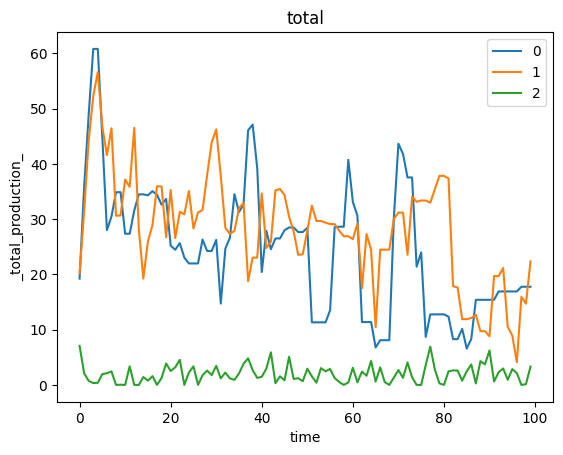

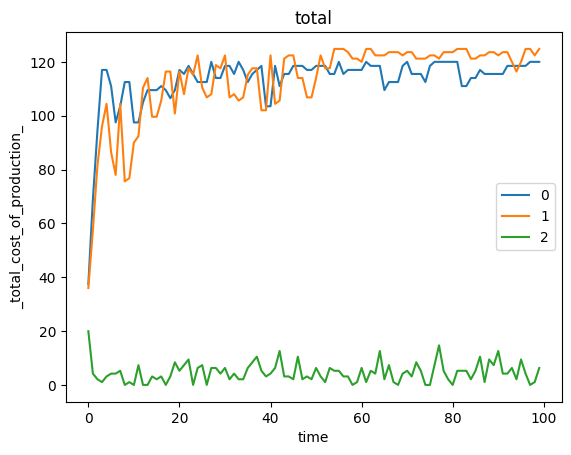

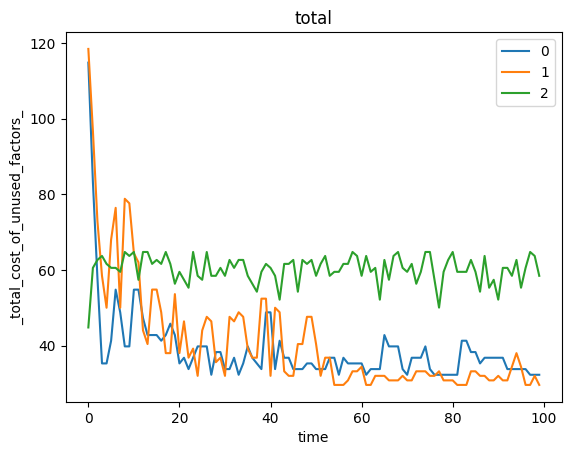

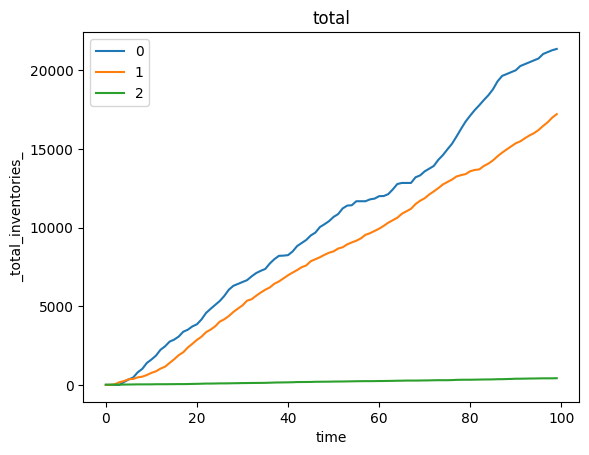

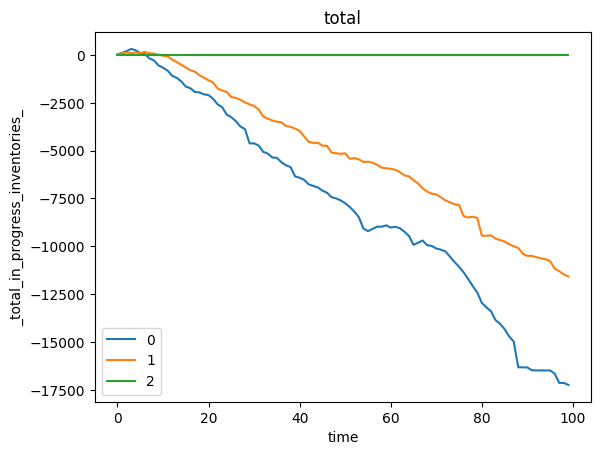

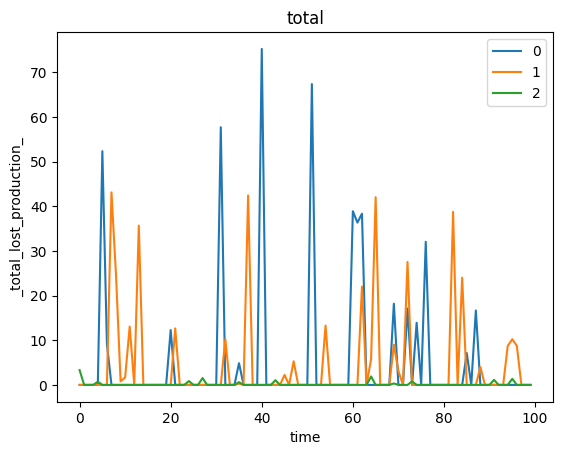

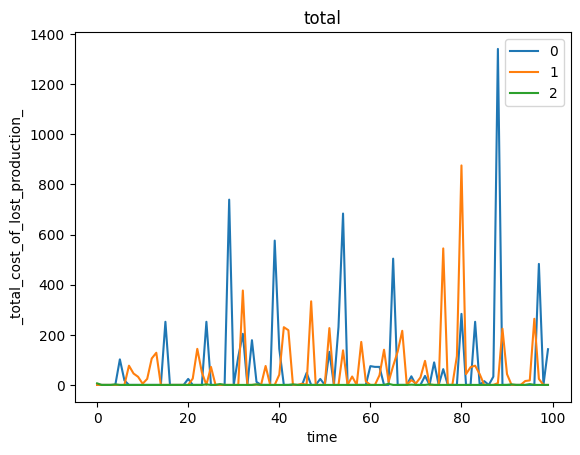

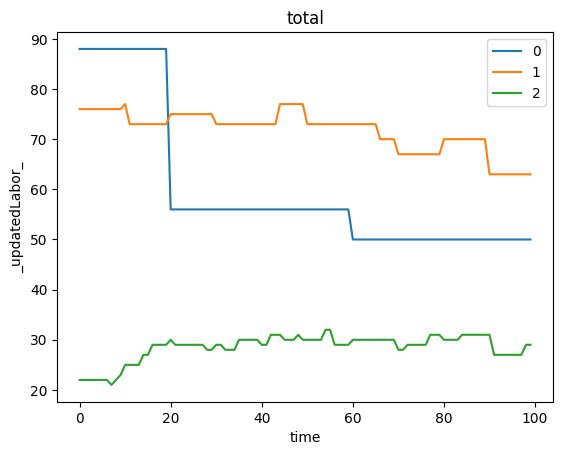

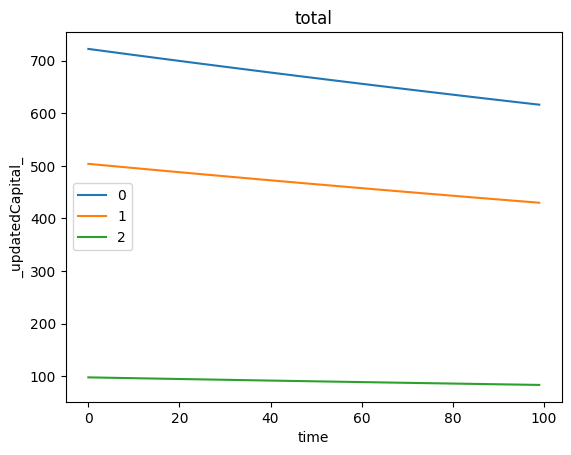

In [6]:
# totals
with plt.rc_context(rc={'figure.max_open_warning': 0}): #to avoid a warning about open plots
    for name in names:
        display(name+", all ranks")
        display(data[name][-1])
        display("____________________________________________________________")
        data[name][-1].plot(title="total",xlabel="time",ylabel=name)